In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
VI = pd.read_csv("VI.csv")
TV = pd.read_csv("TV.csv")
VF = pd.read_csv("VF.csv")

In [188]:
# VI["Current"] = VI["Current"] * 1000

In [189]:
VI["lnI"] = np.round(np.log(VI["Current"]), 3)
VI

,Current,Voltage,lnI
0,0.1,0.605,-2.303
1,0.2,0.634,-1.609
2,0.3,0.651,-1.204
3,0.4,0.662,-0.916
4,0.5,0.670,-0.693
5,0.7,0.683,-0.357
6,1.0,0.697,0.000
7,1.5,0.711,0.405
8,2.0,0.721,0.693
9,3.0,0.736,1.099


## V Vs lnI

In [190]:
plt.rcdefaults()

In [191]:
def poly_regression(X, Y, order=3, plot=True, stats = True, title=None, filename="img.jpg",
                    xlabel="Voltage", ylabel="lnI"):
    """
    Polynomial regression of order m using least squares method.
    
    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    order : int, optional
        Order of the polynomial. Default is 3.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the polynomial regression model.
    stats : dict
        Statistics of the polynomial regression model.
        `r2` : square of correlation coefficient
        `syx` : standard error of the estimate
    """
    Xis = np.zeros(2*order+1)
    Yis = np.zeros(order+1)
    n= len(X)
    for i in range(0, 2*order+1):
        if i ==0:
            Xis[i] = n
            continue
        xi = np.sum(X**i)
        Xis[i] = xi
        
    for i in range(1, order+2):
        yi = np.sum(Y*(X**(i-1)))
        Yis[i-1] = yi
    A = np.zeros((order+1, order+1))
    for i in range(0, order+1):
        A[i] = Xis[i:i+order+1]
    beta = np.linalg.solve(A,Yis)

    if plot:
        X_l = np.linspace(np.min(X)-np.std(X),np.max(X)+np.std(X), 100)
        def predict(X_l):
            Y_l = 0
            for i in range(0, order+1):
                Y_l += beta[i]*X_l**i
            return Y_l
        Y_l = predict(X_l)
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlim(np.min(X)-np.std(X),np.max(X)+np.std(X))
        plt.ylim(np.min(Y)-np.std(Y),np.max(Y)+np.std(Y))
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)
        text = "Regression line: "
        text += f"$Y = {round(beta[1],3)}X{round(beta[0],3)}$"
        plt.annotate(text, xy=(0.6, 0.3), xycoords='axes fraction',
                        xytext=(0, -30), textcoords='offset points',
                        ha='center', va='top', fontsize=15)
        plt.title(title)
        plt.grid()
        plt.tight_layout()
        plt.savefig(filename)
        plt.show();

    if stats:
        xmean = np.mean(X)
        ymean = np.mean(Y)
        y_pred = predict(X)
        Sr = np.sum((Y-y_pred)**2)
        SYX = np.sqrt(Sr/(n-order-1))
        #r2
        r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
        stats = {"r2": r2, "syx": SYX}
        return beta, stats
    else:
        return beta
    

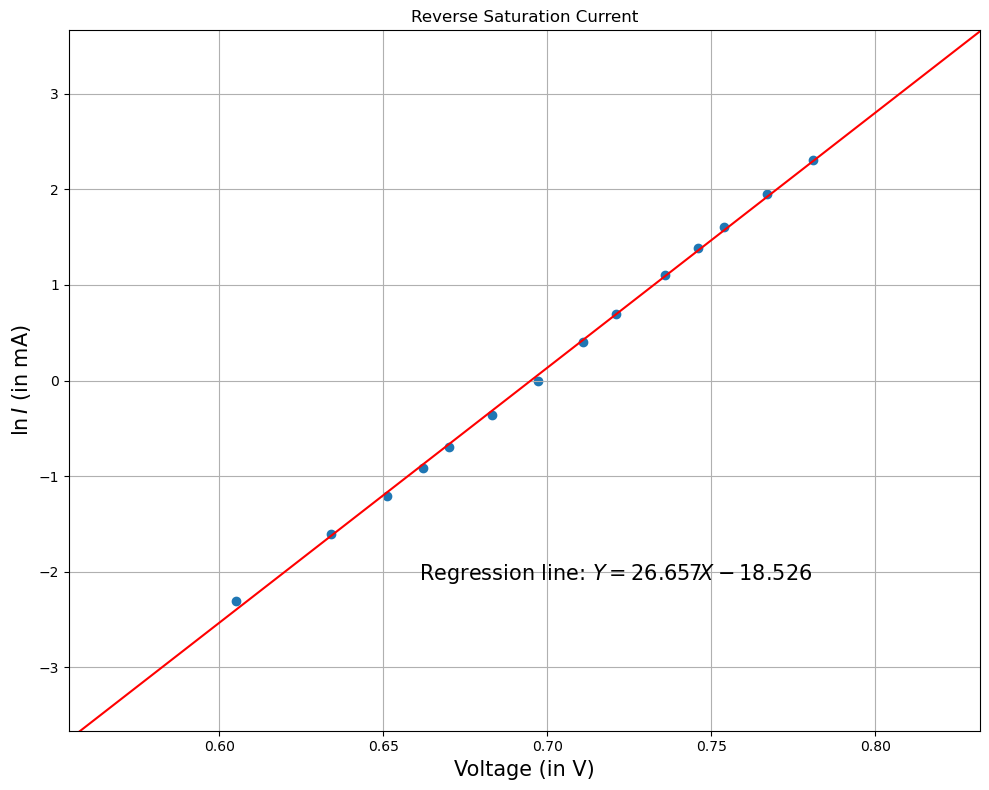

In [192]:
title = "Reverse Saturation Current"
filename = "img_VI.jpg"
ylabel = "$\lnI$ (in mA)"
xlabel="Voltage (in V)"
beta, stats = poly_regression(VI["Voltage"], VI["lnI"], order=1, plot=True, stats=True, title=title, filename=filename,
                    xlabel=xlabel, ylabel=ylabel)

In [193]:
VI.columns = ["Current (in mA)", "Voltage (in V)", "lnI"]
VI

,Current (in mA),Voltage (in V),lnI
0,0.1,0.605,-2.303
1,0.2,0.634,-1.609
2,0.3,0.651,-1.204
3,0.4,0.662,-0.916
4,0.5,0.670,-0.693
5,0.7,0.683,-0.357
6,1.0,0.697,0.000
7,1.5,0.711,0.405
8,2.0,0.721,0.693
9,3.0,0.736,1.099


In [194]:
VI.to_html("VI.html")

## V vs Temperature

In [195]:
def poly_regression(X, Y, order=3, plot=True, stats = True, title=None, filename="img.jpg",
                    xlabel="Voltage", ylabel="lnI"):
    """
    Polynomial regression of order m using least squares method.
    
    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    order : int, optional
        Order of the polynomial. Default is 3.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the polynomial regression model.
    stats : dict
        Statistics of the polynomial regression model.
        `r2` : square of correlation coefficient
        `syx` : standard error of the estimate
    """
    Xis = np.zeros(2*order+1)
    Yis = np.zeros(order+1)
    n= len(X)
    for i in range(0, 2*order+1):
        if i ==0:
            Xis[i] = n
            continue
        xi = np.sum(X**i)
        Xis[i] = xi
        
    for i in range(1, order+2):
        yi = np.sum(Y*(X**(i-1)))
        Yis[i-1] = yi
    A = np.zeros((order+1, order+1))
    for i in range(0, order+1):
        A[i] = Xis[i:i+order+1]
    beta = np.linalg.solve(A,Yis)

    if plot:
        X_l = np.linspace(np.min(X)-np.std(X),np.max(X)+np.std(X), 100)
        def predict(X_l):
            Y_l = 0
            for i in range(0, order+1):
                Y_l += beta[i]*X_l**i
            return Y_l
        Y_l = predict(X_l)
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlim(np.min(X)-np.std(X),np.max(X)+np.std(X))
        plt.ylim(np.min(Y)-np.std(Y),np.max(Y)+np.std(Y))
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)
        text = "Regression line: "
        text += f"$Y = {round(beta[1],3)}X+{round(beta[0],3)}$"
        plt.annotate(text, xy=(0.3, 0.3), xycoords='axes fraction',
                        xytext=(0, -30), textcoords='offset points',
                        ha='center', va='top', fontsize=15)
        plt.title(title)
        plt.grid()
        plt.tight_layout()
        plt.savefig(filename)
        plt.show();

    if stats:
        xmean = np.mean(X)
        ymean = np.mean(Y)
        y_pred = predict(X)
        Sr = np.sum((Y-y_pred)**2)
        SYX = np.sqrt(Sr/(n-order-1))
        #r2
        r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
        stats = {"r2": r2, "syx": SYX}
        return beta, stats
    else:
        return beta
    

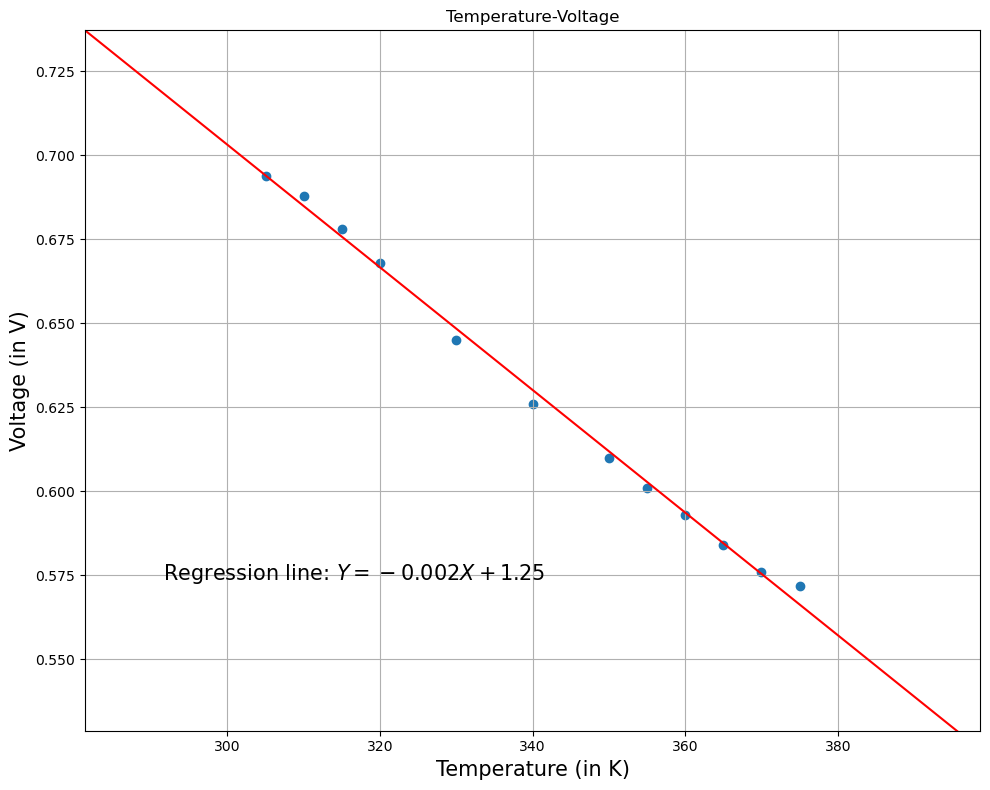

In [196]:
title = "Temperature-Voltage"
filename = "img_TV.jpg"
xlabel="Temperature (in K)"
ylabel="Voltage (in V)"
beta, stats = poly_regression(TV["Temperature"], TV["Voltage"], order=1, plot=True, stats=True, title=title, filename=filename,
                    xlabel=xlabel, ylabel=ylabel)

In [197]:
TV.columns = ["Temperature (in K)", "Voltage (in V)"]
TV.to_html("TV.html")

## V vs Vs

In [198]:
def get_cd(row):
    V1 = row["V1"]
    V2 = row["V2"]
    return 0.41*np.sqrt(V2**2-V1**2)

In [199]:
VF["Cd"] = VF.apply(get_cd, axis=1)

In [200]:
from scipy.interpolate import interp1d
inter = interp1d(VF["Voltage"], VF["Cd"], kind="cubic")
voltages = np.linspace(np.min(VF["Voltage"]), np.max(VF["Voltage"]), 100)
cds = inter(voltages)

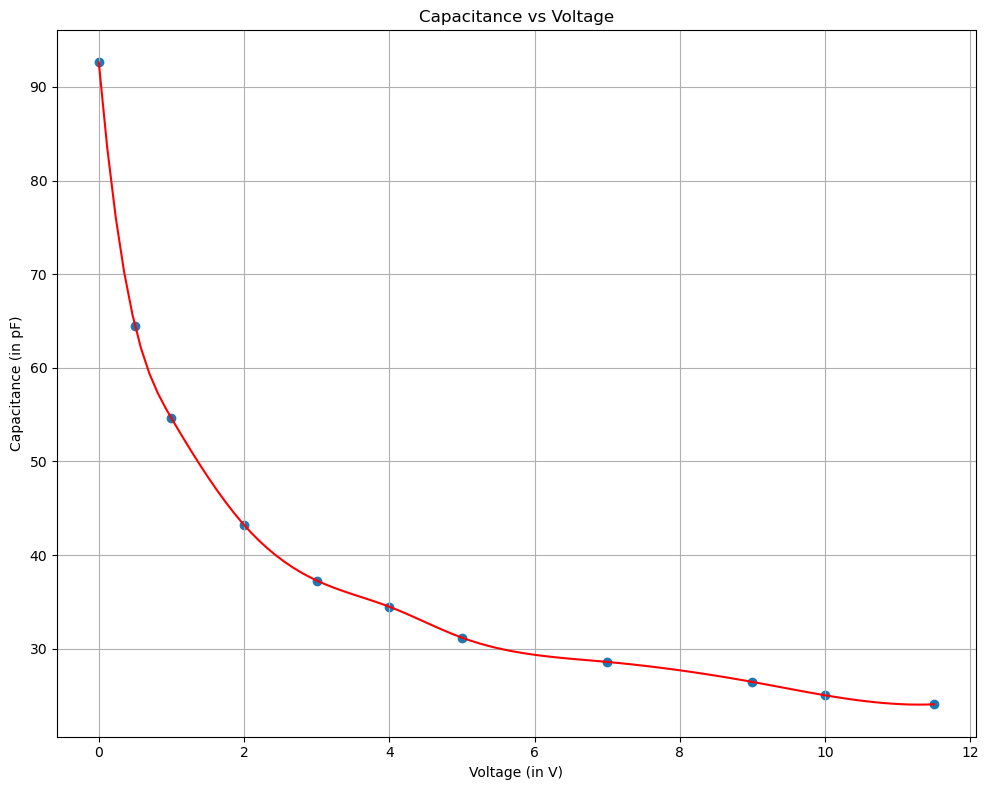

In [201]:
plt.figure(figsize=(10,8))
plt.scatter(-VF["Voltage"], VF["Cd"])
plt.plot(-voltages, cds, "r")
plt.title("Capacitance vs Voltage")
plt.xlabel("Voltage (in V)")
plt.ylabel("Capacitance (in pF)")
plt.grid()
plt.tight_layout()
plt.savefig("img_VF.jpg");

In [202]:
VF["Cd"] = np.round(VF["Cd"], 3)

In [203]:
VF.columns = ["Voltage (in V)", "Voltage at 5KHz (in V)","Voltage at 20KHz (in V)",  "Cd (in pF)"]

In [204]:
VF

,Voltage (in V),Voltage at 5KHz (in V),Voltage at 20KHz (in V),Cd (in pF)
0,0.0,84,241,92.614
1,-0.5,62,169,64.459
2,-1.0,52,143,54.616
3,-2.0,46,115,43.214
4,-3.0,44,101,37.274
5,-4.0,42,94,34.479
6,-5.0,38,85,31.173
7,-7.0,35,78,28.580
8,-9.0,32,72,26.444
9,-10.0,30,68,25.020


In [205]:
VF.to_html("VF.html")